In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df=pd.read_csv("car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
print(df.Fuel_Type.value_counts(),"\n")
print(df.Seller_Type.value_counts(),"\n")
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
#Fuel_Type ==> 1 = Petrol , 0 = Diesel , 2 = CNG
#Seller_Type ==> 1 = Manual , 0 = Automatic 
#Seller_Type ==> 1 = Dealer , 0 = Individual

df.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
df.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
df.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
df[["Fuel_Type","Seller_Type","Transmission"]]=df[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
print(df.Year.unique())
print(min(df.Year.unique()))
print(max(df.Year.unique()))

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
2003
2018


In [9]:
print(df.Owner.unique())

[0 1 3]


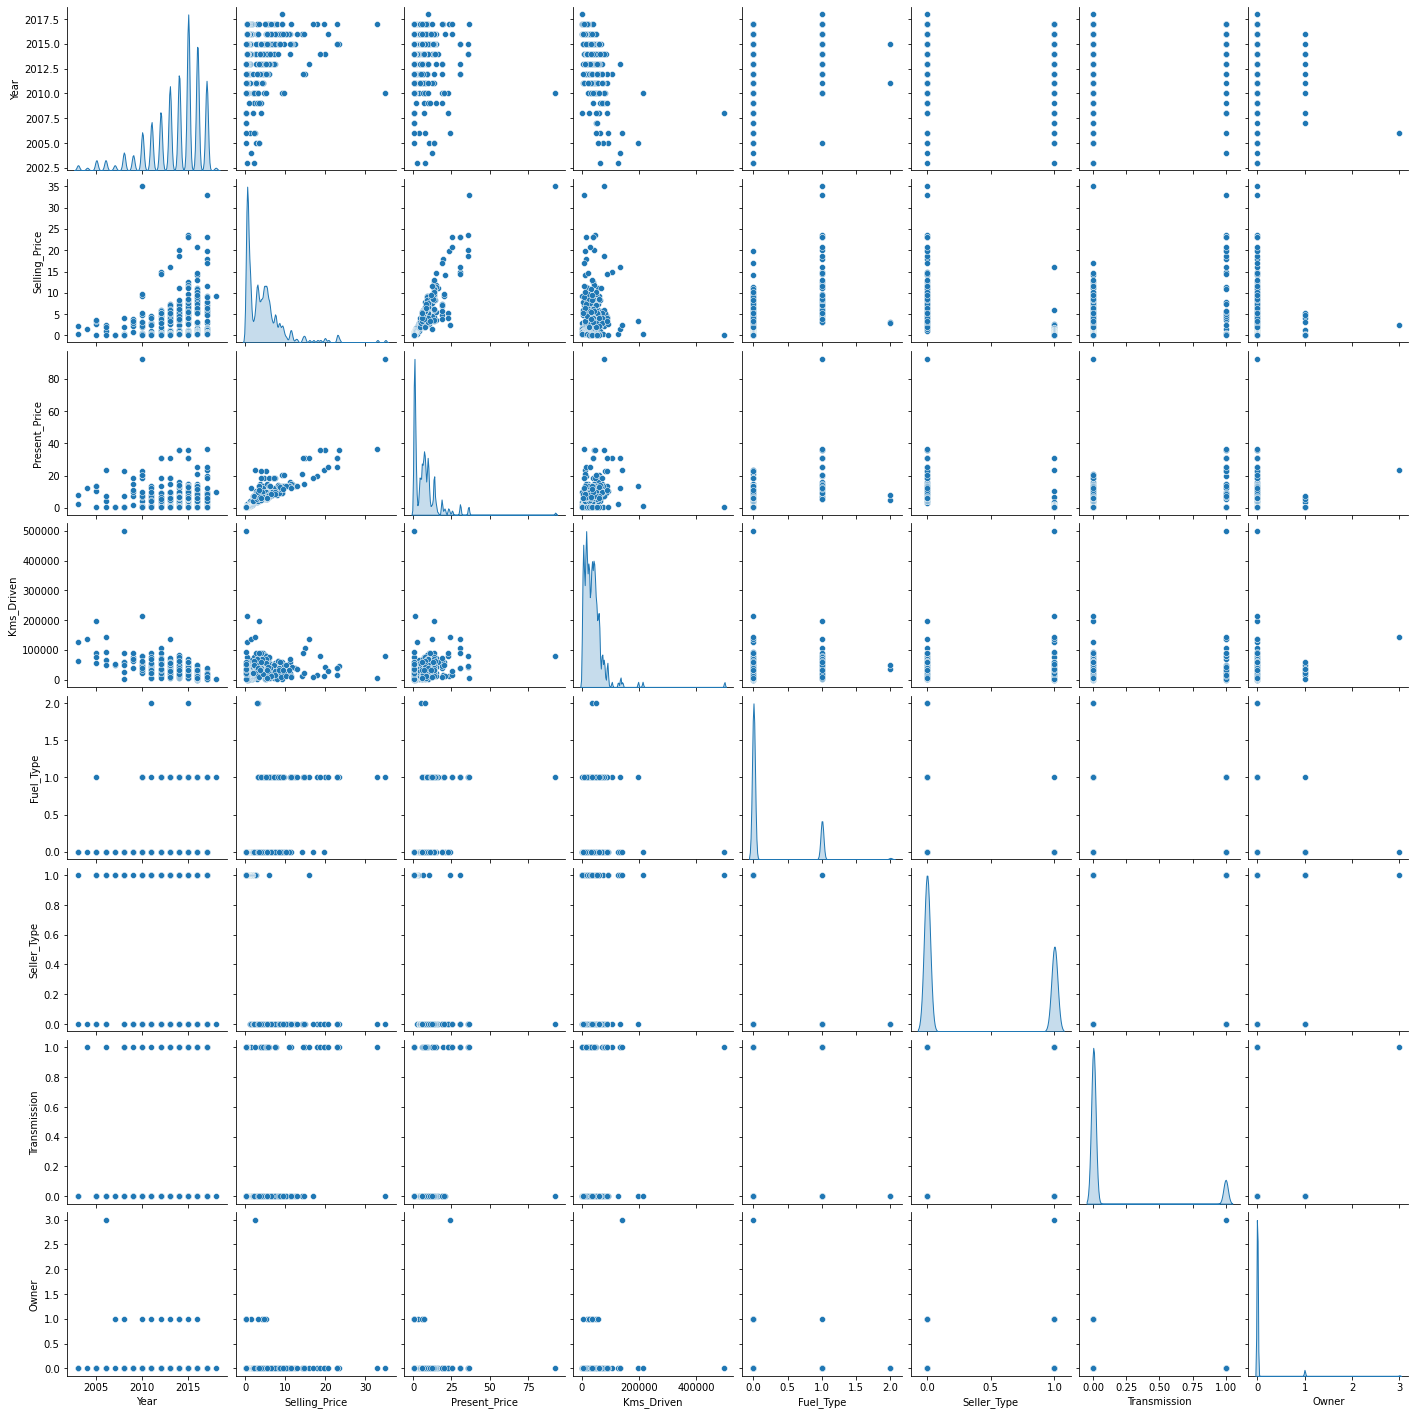

In [10]:
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

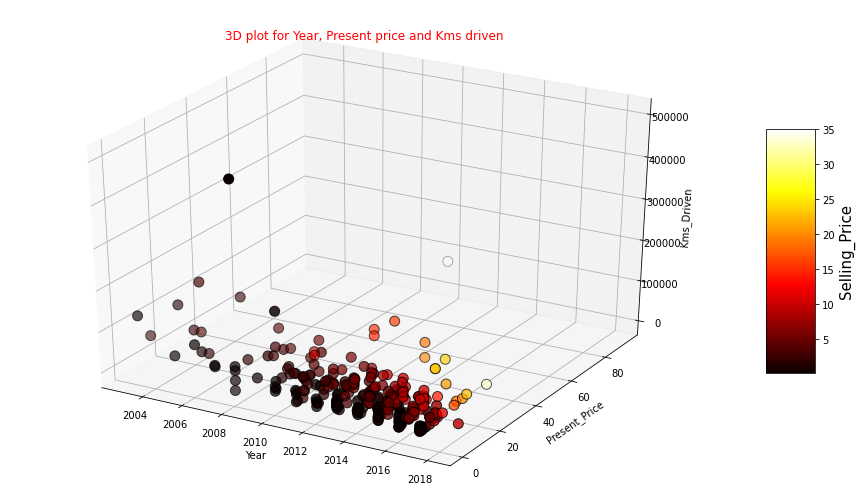

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["Year"],
           df["Present_Price"],
           df["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=df["Selling_Price"],s=100,cmap="hot")

ax.set_xlabel("Year")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Selling_Price",fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven",color="red")
plt.show()

In [12]:
y=df.Selling_Price
x=df.drop(["Selling_Price","Car_Name"],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


In [14]:
x_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
102,2017,1.78,4000,0,1,0,0
80,2016,14.89,23000,1,0,0,0
245,2012,9.40,71000,1,0,0,0
163,2010,0.95,27000,0,1,0,0
131,2015,0.82,18000,0,1,0,0


In [15]:
y_train.head()

102     1.65
80     14.73
245     5.20
163     0.45
131     0.75
Name: Selling_Price, dtype: float64

In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

r_2 score : 0.8484549412088829 

CV scores: [0.89746723 0.88756505 0.83007487 0.81438137 0.75880539] 

CV scores mean: 0.8376587811920289


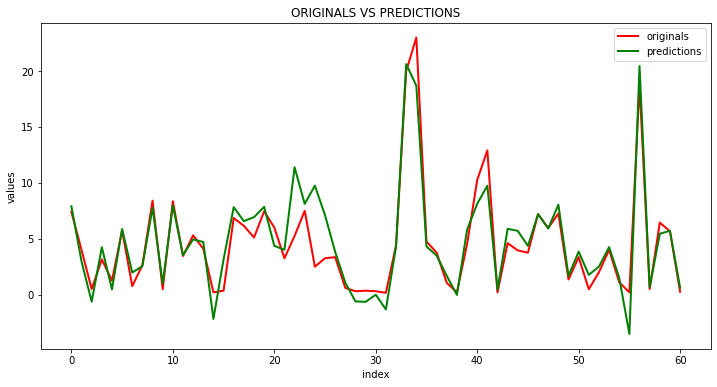

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.8375477148312642
0.001


In [19]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(x_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.8377184461024152
0.5878016072274912


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001) 

r_2 score : 0.8495567867442748 

CV scores: [0.89841767 0.88466039 0.82899042 0.81480488 0.77521494] 

CV scores mean: 0.8404176598072958


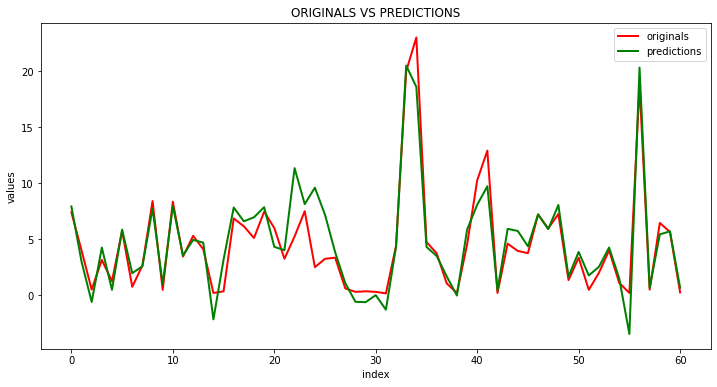

In [20]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,x_train,y_train,x_test,y_test)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

r_2 score : 0.9307450491285552 

CV scores: [0.93657371 0.87562294 0.79539112 0.91344473 0.73821037] 

CV scores mean: 0.8518485725165752


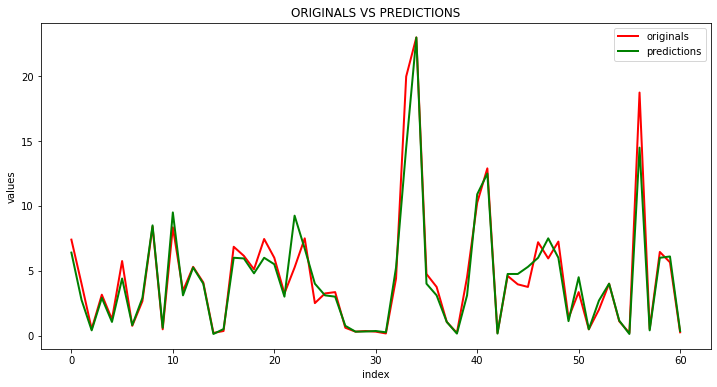

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

r_2 score : 0.9010356689515354 

CV scores: [0.93408048 0.9694762  0.85502122 0.9376604  0.72016603] 

CV scores mean: 0.8832808650586859


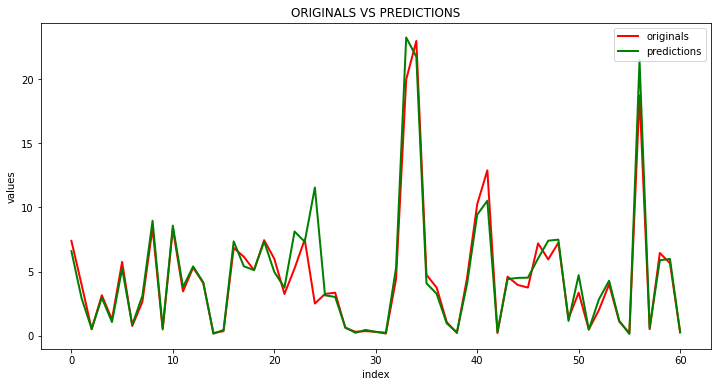

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,x_train,y_train,x_test,y_test)

In [23]:
dtr.predict([[2016,1.68,3000,1,1,0,2]])

array([1.35])

In [24]:
import pickle
# open a file, where you ant to store the data
file = open('DecisionTree_model.pkl', 'wb')

# dump information to that file
pickle.dump(dtr, file)